In [5]:
# Required to install

!pip install yfinance 


Defaulting to user installation because normal site-packages is not writeable


# libraries

In [8]:

import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [10]:
# Here we load historical stock data

stock = 'AAPL'  
data = yf.download(stock, start="2020-01-01", end="2024-12-31")
data = data.dropna()
data.head()


C:\Users\ASAD SHAH\AppData\Local\Temp\ipykernel_15712\2400791516.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(stock, start="2020-01-01", end="2024-12-31")
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2020-01-02,72.620842,72.681289,71.373218,71.627092,135480400
2020-01-03,71.914818,72.676447,71.689957,71.847118,146322800
2020-01-06,72.487839,72.526526,70.783241,71.034702,118387200
2020-01-07,72.146950,72.753831,71.926922,72.497537,108872000
2020-01-08,73.307518,73.609752,71.849540,71.849540,132079200


In [12]:
# Here we prepare the data

data['Target'] = data['Close'].shift(-1)  
data = data.dropna()

features = ['Open', 'High', 'Low', 'Volume']
X = data[features]
y = data['Target']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.2)


In [16]:
#  Train the Linear Regression model

model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)


# Plotting

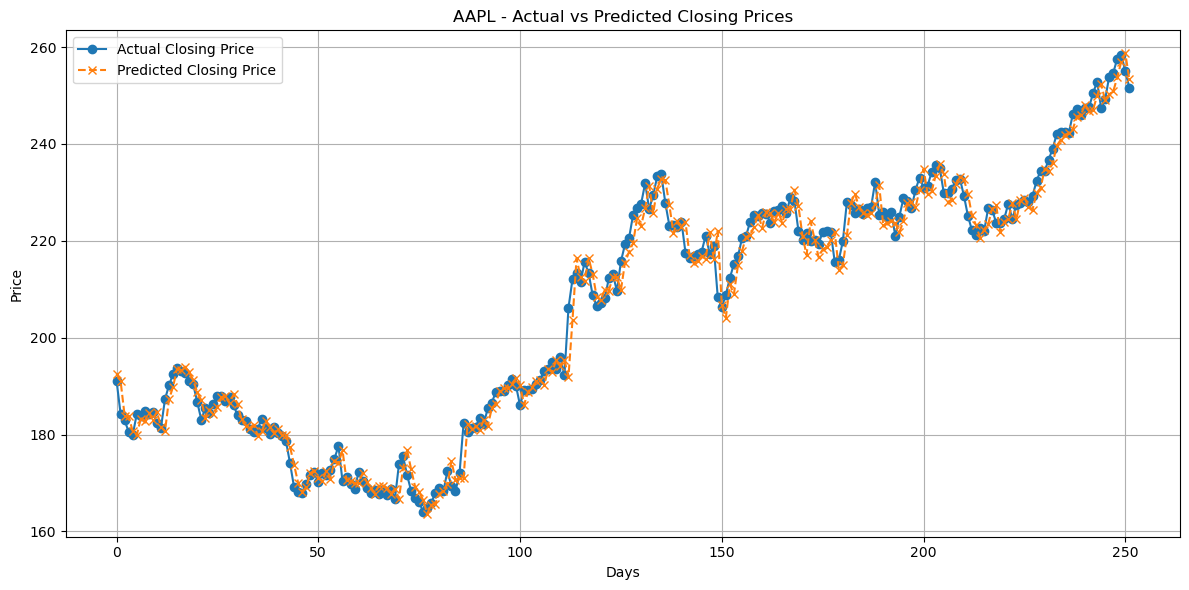

Root Mean Squared Error: 3.11


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [19]:
# Cell 6: Evaluate and plot the results
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual Closing Price', marker='o')
plt.plot(predictions, label='Predicted Closing Price', linestyle='--', marker='x')
plt.title(f"{stock} - Actual vs Predicted Closing Prices")
plt.xlabel("Days")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Print RMSE
rmse = mean_squared_error(y_test, predictions, squared=False)
print(f"Root Mean Squared Error: {rmse:.2f}")
